In [0]:
# Initial Setup

import os
import nibabel as nib
import matplotlib.pyplot as plt
%matplotlib inline
from random import seed
from random import randint
os.chdir("/content/drive/My Drive/Colab Notebooks/Datasets/hh/t1")

In [0]:
def crop_tuple_of_images(input_tuple, random_seed):
  seed(random_seed)
  image_number = randint(0, 240)
  start_pixel_y = randint(0, 180)
  sum_up_y = randint(11, 31)
  end_pixel_y = start_pixel_y + sum_up_y
  start_pixel_x = randint(0, 240)
  sum_up_x = randint(11, 31)
  end_pixel_x = start_pixel_x + sum_up_x

  image_count = 0
  processed_list = list()

  for image in input_tuple:
    processed_image = image[image_number, start_pixel_y:end_pixel_y, start_pixel_x:end_pixel_x]
    processed_list.append(processed_image) 
    image_count = image_count + 1

  pixel_specs = [image_number, start_pixel_y, end_pixel_y, sum_up_y, start_pixel_x, end_pixel_x, sum_up_x]
  output_tuple = tuple(processed_list)

  message_string = "Processed -> " + str(image_count) + "images...."
  print(message_string)

  return (output_tuple, pixel_specs)

In [0]:
os.chdir("/content/drive/My Drive/Colab Notebooks/Datasets/hh/t1")
images_set_1 = nib.load("IXI012-HH-1211-T1_fcm.nii.gz")
images_set_1 = images_set_1.get_fdata()
os.chdir("/content/drive/My Drive/Colab Notebooks/Datasets/hh/t2")
images_set_2 = nib.load("IXI012-HH-1211-T2_reg_fcm.nii.gz")
images_set_2 = images_set_2.get_fdata()

input_tuple = (images_set_1, images_set_2)

In [28]:
returned_tuple, random_numbers = crop_tuple_of_images(input_tuple, random_seed = 11)

Processed -> 2images....


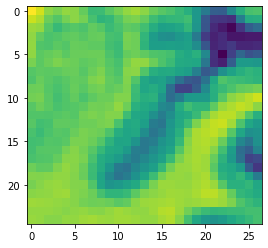

In [31]:
plt.imshow(returned_tuple[0])

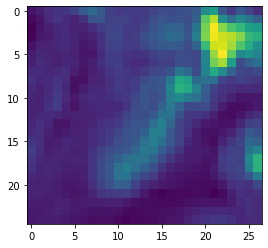

In [30]:
plt.imshow(returned_tuple[1])

In [32]:
random_numbers

[115, 143, 168, 25, 115, 142, 27]